# Cyclistic Bike-Share Analytics: Uncovering Rider Behaviors

## Recap From Last Time

Before, we analyzed this project by using a spreadsheet. But spreadsheets can"t handle massive amounts of data, so we only analyzed data for one month(Jan 2023). This time, we will analyze the whole 2023 year data by using Python and visualization. Although the marketing director wants to convert Casual Riders into annual Members, enhancing growth and profitability, this differs from the question document assigned to us. So, we will keep exploring the same question from last time: **"How do annual members and casual riders utilize Cyclistic bikes differently?"**

## Background Information 

Cyclistic, a bike-share company in Chicago. The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, your team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights, your team will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives must approve your recommendations, so they must be backed up with compelling data insights and professional data visualizations.

Key information includes:

- **Cyclistic:** A bike-share company based in Chicago with a range of bicycles, including accessible options.
- **Users:** Primarily Casual Riders (single-ride or full-day pass users) and Members (annual membership holders).
- **Goal:** To convert Casual Riders into annual Members, enhancing growth and profitability.

## Step Approach

To complete this analysis, we will follow five steps below: 
- Step 1: Ask a question
- Step 2: Data Collection
- Step 3: Data Process and Cleaning
    - Data Overview
    - Data Cleaning
        - Missing Value
        - Outliers
        - Duplicated
- Step 4: Data analysis
- Step 5: Data Visualization and conclusion


Now, Let"s start our Python Analysis journey!

## Step 1: Ask a Question

The guiding question for the analysis is

**How do annual members and casual riders utilize Cyclistic bikes differently?**

## Step 2: Data Collection

Since data is given, so we are skip this step. 

## Step 3: Data Process and Cleaning

### 3.1 Import and Load
Let"s do some prepare by import module and file.

In [1]:
# Import module
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/tmp/ipykernel_16179/777269988.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Read in all data from Jan 2023 - Nov 2023
import pandas as pd

dataframes = []  # List to store all dataframes

for i in range(1, 12):
    month = f"{i:02}"  # Formats the month with a leading zero if necessary
    filename = f"DataSet/2023{month}-divvy-tripdata.csv"
    data = pd.read_csv(filename)
    dataframes.append(data)

# Combine all DataFrames into one
df = pd.concat(dataframes, ignore_index=True)


### 3.2 Data Overview

We begin the data process and cleaning by examining the data first.

In [3]:
# Combine Successfully!
# Now let"s examine data
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5495804 entries, 0 to 5495803
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 545.1+ MB


For some reason(maybe file too big), info() function can"t show how many rows for each columns. So we will use another way.

In [4]:
# Calculate non-null counts for each column
non_null_counts = df.notnull().sum()
print(non_null_counts)

ride_id               5495804
rideable_type         5495804
started_at            5495804
ended_at              5495804
start_station_name    4655798
start_station_id      4655666
end_station_name      4604526
end_station_id        4604385
start_lat             5495804
start_lng             5495804
end_lat               5489053
end_lng               5489053
member_casual         5495804
dtype: int64



As we can see, there is indeed some value that needs to be added. So, we are in the next step: Data Cleaning. 

### 3.3 Data Cleaning

To do Data Cleaning, we must follow those three steps in order:
- Missing values
- Outliers 
- Duplicates

#### 3.3.1 Missing values

That"s check missing value first. Recap of our question: We want to explore different use patterns between the members and casual users. So we don"t need any info about the map, such as station and latitude/longitude, ride id is not unique, too. This decision also helps reduce data size. The columns are delete is: 
```"ride_id", "start_station_name", "start_station_id", "end_station_name", "end_station_id", "start_lat", "start_lng", "end_lat", "end_lng"```

In [5]:
# Columns to be dropped
columns_to_drop = ["ride_id", 
                   "start_station_name", "start_station_id", 
                   "end_station_name", "end_station_id", 
                   "start_lat", "start_lng", 
                   "end_lat", "end_lng"]

# Drop the columns from the DataFrame
df = df.drop(columns=columns_to_drop, axis=1)

# Verify the columns have been dropped
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5495804 entries, 0 to 5495803
Data columns (total 4 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   rideable_type  object
 1   started_at     object
 2   ended_at       object
 3   member_casual  object
dtypes: object(4)
memory usage: 167.7+ MB


In [6]:
# It seems like info() function don't show how many rows for each columns again.
non_null_counts_update = df.notnull().sum()
non_null_counts_update

rideable_type    5495804
started_at       5495804
ended_at         5495804
member_casual    5495804
dtype: int64

After we got the columns we needed, examining the data again, we saw no missing values. So we can go to the next step: check outliers. 

#### 3.3.2 Outliers

Check if data is outliers. 
Notes: Outliers refer to unreasonable values in the data. This unreasonable value usually requires one's own judgment on the data set to obtain it.

In [7]:
# Check if invalid value exist in columns "member_casual"
invalid_user_types_count = df[~df["member_casual"].isin(["casual", "member"])].shape[0]
invalid_user_types_count

0

In [8]:
# Check if invalid value exist in columns "rideable_type"
valid_rideable_types = ["electric_bike", "classic_bike", "docked_bike"]
invalid_rideable_types_count = df[~df["rideable_type"].isin(valid_rideable_types)].shape[0]
invalid_rideable_types_count

0

Next, we need check for time. End time must be greater than start time. Otherwise, it's outlier.

In [9]:
# Transfer from string format to time format
df["started_at"] = pd.to_datetime(df["started_at"])
df["ended_at"] = pd.to_datetime(df["ended_at"])

# Count the number of trips where the end time is not greater than the start time
invalid_durations = df[df["ended_at"] <= df["started_at"]].index
invalid_durations

Index([   3315,   11267,   13354,   67062,  111486,  112992,  124796,  124849,
        204036,  204063,
       ...
       5459499, 5460738, 5463750, 5465158, 5468330, 5473852, 5474975, 5483380,
       5484563, 5489508],
      dtype='int64', length=1214)

Woops! There are 1214 outliers, it means there are 1214 entries of data start time is greater than end time, which is impossible. We need drop them. 


In [10]:
# Delete outliers values
df.drop(index= invalid_durations, inplace= True)

Next, we check Trip Duration, see if any outliers.


In [11]:
# Create a new columns call "Trip Duration"
df["Trip Duration"] = df["ended_at"] - df["started_at"]
df["Trip Duration"]

0         0 days 00:10:51
1         0 days 00:08:29
2         0 days 00:13:14
3         0 days 00:08:46
4         0 days 00:15:19
                ...      
5495799   0 days 00:07:36
5495800   0 days 00:02:40
5495801   0 days 00:08:58
5495802   0 days 00:02:00
5495803   0 days 00:01:40
Name: Trip Duration, Length: 5494590, dtype: timedelta64[ns]

Let's find Max and Min ride length.

In [12]:
print(df["Trip Duration"].max())
print(df["Trip Duration"].min())

68 days 09:29:04
0 days 00:00:01


As we can see, the max ride length is 68 days, 9 hours, 29 mins, and 4 seconds, and the minimum ride length is only 1 second. Those data do NOT make sense; it's an outlier. 

So we have to set a limit here. Combined with the actual situation and my opinion, I will put the minimum ride length to at least 5 minutes and the max ride length of 12 hours (720 mins).

In [13]:
# Define the minimum and maximum durations in minutes
min_duration = pd.Timedelta("5 minutes")
max_duration = pd.Timedelta("12 hours")

# Filter the DataFrame for trips with durations within the specified range
df_filtered = df[(df["Trip Duration"] >= min_duration) & (df["Trip Duration"] <= max_duration)]

# df_filtered contains only the trips that are between 5 minutes and 12 hours

### 3.3.3 Duplicates

Check if values contains duplicates.

In [14]:
duplicates = df_filtered.duplicated()

num_duplicates = duplicates.sum()
num_duplicates

142

As we can see, there are 142 duplicated, we need delete them.


In [15]:
# Delete duplicated
df_filtered.drop(index= num_duplicates, inplace = True)

/tmp/ipykernel_16179/2274477760.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.drop(index= num_duplicates, inplace = True)



By now, we can make sure the data is immaculate and process successfully, we are officially finished with the data process and cleaning. Let's re-examine data again.


In [16]:
non_null_counts_v2 = df.notnull().sum()
non_null_counts_v2

rideable_type    5494590
started_at       5494590
ended_at         5494590
member_casual    5494590
Trip Duration    5494590
dtype: int64

Let's move on to the next step: data analysis!

## Step 4: Data analysis

### 4.1 Proportion

In this part, we will find Proportion for casual/member and Proportion for rideable type, and BOTH.

Calculate Proportion between casual and member user

In [17]:
number_counts = df_filtered["member_casual"].value_counts()
ratio_counts = df_filtered["member_casual"].value_counts(normalize= True)

print(number_counts)
print()
print(ratio_counts)

member_casual
member    2606295
casual    1684427
Name: count, dtype: int64

member_casual
member    0.607426
casual    0.392574
Name: proportion, dtype: float64


Calculate ratio for rideable type

In [18]:
num_rideable = df_filtered["rideable_type"].value_counts()
ratio_rideable = df_filtered["rideable_type"].value_counts(normalize= True)

print(num_rideable)
print()
print(ratio_rideable)

rideable_type
electric_bike    2130134
classic_bike     2087237
docked_bike        73351
Name: count, dtype: int64

rideable_type
electric_bike    0.496451
classic_bike     0.486454
docked_bike      0.017095
Name: proportion, dtype: float64


Calculate rideable type by both users

In [19]:
rideable_user_ratio = df_filtered.groupby("rideable_type")["member_casual"].value_counts(normalize=True).unstack()
rideable_user_ratio

member_casual,casual,member
rideable_type,,
classic_bike,0.363449,0.636551
docked_bike,1.000000,NaN
electric_bike,0.400196,0.599804


### 4.2 Trip Duration

In this part, we will calculate Trip Duration, Trip Duration for both users, and their average time, average time for both users

Calculate Trip Duration for BOTH casual and member user

In [20]:
# Calculate Trip Duration for BOTH casual and member user
df["Trip Duration(Casual)"] = df_filtered["Trip Duration"].where(df["member_casual"] == "casual")
df["Trip Duration(Member)"] = df_filtered["Trip Duration"].where(df["member_casual"] == "member")

print(df["Trip Duration(Casual)"])
print(df["Trip Duration(Member)"])

0                     NaT
1                     NaT
2         0 days 00:13:14
3                     NaT
4                     NaT
                ...      
5495799               NaT
5495800               NaT
5495801               NaT
5495802               NaT
5495803               NaT
Name: Trip Duration(Casual), Length: 5494590, dtype: timedelta64[ns]
0         0 days 00:10:51
1         0 days 00:08:29
2                     NaT
3         0 days 00:08:46
4         0 days 00:15:19
                ...      
5495799   0 days 00:07:36
5495800               NaT
5495801   0 days 00:08:58
5495802               NaT
5495803               NaT
Name: Trip Duration(Member), Length: 5494590, dtype: timedelta64[ns]


Calculate average ride time for BOTH types of users in 2023

In [21]:
# Calculate Average Trip Duration for BOTH casual and member user
casual_avg_duration = df_filtered["Trip Duration"].where(df["member_casual"] == "casual", pd.NaT).mean()
member_avg_duration = df_filtered["Trip Duration"].where(df["member_casual"] == "member", pd.NaT).mean()
# Print result
print(casual_avg_duration)
print(member_avg_duration)

0 days 00:22:53.060533938
0 days 00:14:53.999194642


Calculate average ride time for BOTH users BY MONTH

*Note: Do NOT set "started_at" to index by using set_index(); this will cause an error that columns "started_at" do not show columns anymore, which causes an error.*

In [22]:
# Calculate average ride time for casual users by month
casual_avg_by_month = df_filtered[df_filtered["member_casual"] == "casual"].groupby(pd.Grouper(key="started_at", freq="M"))["Trip Duration"].mean()

# Calculate average ride time for member users by month
member_avg_by_month = df_filtered[df_filtered["member_casual"] == "member"].groupby(pd.Grouper(key="started_at", freq="M"))["Trip Duration"].mean()

print(casual_avg_by_month)
print(member_avg_by_month)

/tmp/ipykernel_16179/2243527147.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  casual_avg_by_month = df_filtered[df_filtered["member_casual"] == "casual"].groupby(pd.Grouper(key="started_at", freq="M"))["Trip Duration"].mean()
/tmp/ipykernel_16179/2243527147.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  member_avg_by_month = df_filtered[df_filtered["member_casual"] == "member"].groupby(pd.Grouper(key="started_at", freq="M"))["Trip Duration"].mean()


started_at
2023-01-31   0 days 00:16:00.110477890
2023-02-28   0 days 00:18:20.009058359
2023-03-31   0 days 00:17:47.388589950
2023-04-30   0 days 00:22:49.791026056
2023-05-31   0 days 00:24:12.094291953
2023-06-30   0 days 00:23:31.289591009
2023-07-31   0 days 00:24:41.165381829
2023-08-31   0 days 00:23:31.416818889
2023-09-30   0 days 00:23:13.423851487
2023-10-31   0 days 00:21:13.895207632
2023-11-30   0 days 00:18:17.730104841
Freq: ME, Name: Trip Duration, dtype: timedelta64[ns]
started_at
2023-01-31   0 days 00:13:16.066499647
2023-02-28   0 days 00:13:40.505649916
2023-03-31   0 days 00:13:21.714493667
2023-04-30   0 days 00:14:32.870335040
2023-05-31   0 days 00:15:23.879296180
2023-06-30   0 days 00:15:27.659707243
2023-07-31   0 days 00:15:47.887915315
2023-08-31   0 days 00:15:36.735606285
2023-09-30   0 days 00:15:10.543938520
2023-10-31   0 days 00:14:13.487945674
2023-11-30   0 days 00:13:40.661122561
Freq: ME, Name: Trip Duration, dtype: timedelta64[ns]


### 4.3 Day of Week

In this part, we will calculate for BOTH user ride on BOTH weekday and weekend

Filter out rides that only happen on Weekday

In [23]:
# Create a new column "day_of_week"
df_filtered["Day_of_week"] = df_filtered["started_at"].dt.dayofweek
# Filter out weekend((Saturday=5, Sunday=6))
weekday_df = df_filtered[df_filtered["Day_of_week"] < 5]
weekday_df["Day_of_week"]

/tmp/ipykernel_16179/581218481.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Day_of_week"] = df_filtered["started_at"].dt.dayofweek


1          1
2          0
4          3
7          2
8          2
          ..
5495791    2
5495794    3
5495796    0
5495799    4
5495801    4
Name: Day_of_week, Length: 3014530, dtype: int32

Filter out "day of week" by BOTH users(Weekday)

In [24]:
# Calculate Day of week for BOTH casual and member user
weekday_df["Day of Week(Casual)"] = weekday_df["Day_of_week"].where(df_filtered["member_casual"] == "casual", pd.NaT)
weekday_df["Day of Week(Member)"] = weekday_df["Day_of_week"].where(df_filtered["member_casual"] == "member", pd.NaT)

/tmp/ipykernel_16179/3790673704.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekday_df["Day of Week(Casual)"] = weekday_df["Day_of_week"].where(df_filtered["member_casual"] == "casual", pd.NaT)
/tmp/ipykernel_16179/3790673704.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekday_df["Day of Week(Member)"] = weekday_df["Day_of_week"].where(df_filtered["member_casual"] == "member", pd.NaT)


Filter out rides that only happen on Weekend

In [25]:
# Filter out weekday(Saturday=5, Sunday=6)
weekend_df = df_filtered[(df_filtered["Day_of_week"] == 5) | (df_filtered["Day_of_week"] == 6)] 
weekend_df["Day_of_week"]

0          5
3          6
6          6
30         5
37         5
          ..
5495768    5
5495775    5
5495788    6
5495790    6
5495795    5
Name: Day_of_week, Length: 1276192, dtype: int32

Filter out "day of week" by BOTH users(Weekend)

In [26]:
# Assuming weekend_df is your DataFrame filtered for weekends
weekend_df["Day of Week (Casual)"] = weekend_df["Day_of_week"].where(weekend_df["member_casual"] == "casual")
weekend_df["Day of Week (Member)"] = weekend_df["Day_of_week"].where(weekend_df["member_casual"] == "member")

/tmp/ipykernel_16179/2206243739.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekend_df["Day of Week (Casual)"] = weekend_df["Day_of_week"].where(weekend_df["member_casual"] == "casual")
/tmp/ipykernel_16179/2206243739.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekend_df["Day of Week (Member)"] = weekend_df["Day_of_week"].where(weekend_df["member_casual"] == "member")


After we did the analysis, save the file(If needed).

In [27]:
# Save file
# df.to_csv("Cyclistic_Trip_Data.csv")

Finally, we can use describe() again to check data

In [28]:
df_filtered.describe()

,started_at,ended_at,Trip Duration,Day_of_week
count,4290722,4290722,4290722,4.290722e+06
mean,2023-07-11 23:44:18.202374656,2023-07-12 00:02:20.268717056,0 days 00:18:02.066343846,3.075552e+00
min,2023-01-01 00:02:06,2023-01-01 00:13:21,0 days 00:05:00,0.000000e+00
25%,2023-05-22 18:01:44,2023-05-22 18:21:07.750000128,0 days 00:08:00,1.000000e+00
50%,2023-07-17 19:18:47.500000,2023-07-17 19:37:20.500000,0 days 00:12:07,3.000000e+00
75%,2023-09-08 13:10:39.249999872,2023-09-08 13:25:52,0 days 00:20:01,5.000000e+00
max,2023-11-30 23:59:14,2023-12-01 08:06:25,0 days 11:59:26,6.000000e+00
std,NaN,NaN,0 days 00:23:18.804741376,1.959402e+00


## Step 5 Data Visualization and Conclusion

So far, we have completed our analysis. Let's use the result we just analyzed and visualize the data!

We will first begin by ratio.

### 5.1 Proportion

#### 5.1.1 User Proportion: Casual User & Member User

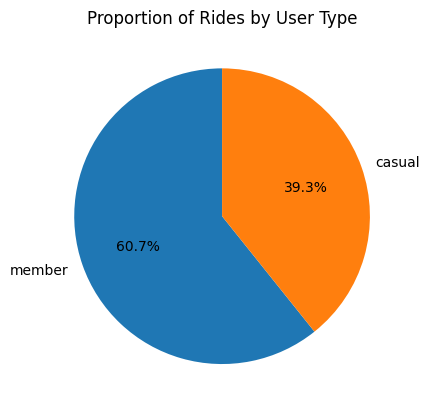

In [29]:
plt.pie(ratio_counts, labels=ratio_counts.index, autopct="%1.1f%%", startangle=90)
plt.title("Proportion of Rides by User Type")
plt.show()

**Interpretation**

From this chart, we can observe that the majority of rides are taken by members. This shows that there is a strong base of ordinary users who frequently use bike-sharing services.

#### 5.1.2: Ratio for Rideable Type

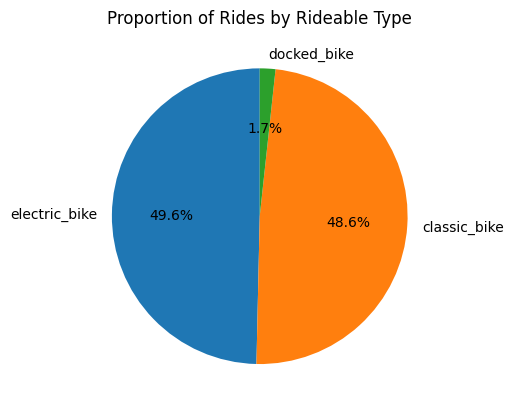

In [30]:
plt.pie(ratio_rideable, labels=ratio_rideable.index, autopct="%1.1f%%", startangle=90)
plt.title("Proportion of Rides by Rideable Type")
plt.show()

**Interpretation**

From this chart, Usage for eletric bikes is and classic bikes are indicating that their market shares are roughly equal. This near parity suggests that across the entire user base, there isn't a strong overall preference for one over the other. Both types of bikes are almost equally popular. Docked bikes only account for a extremely small percentage, suggesting that they are not popular at all.


#### 5.1.3 Rideable Type by Both Users

Text(0, 0.5, 'Proportion of Users')

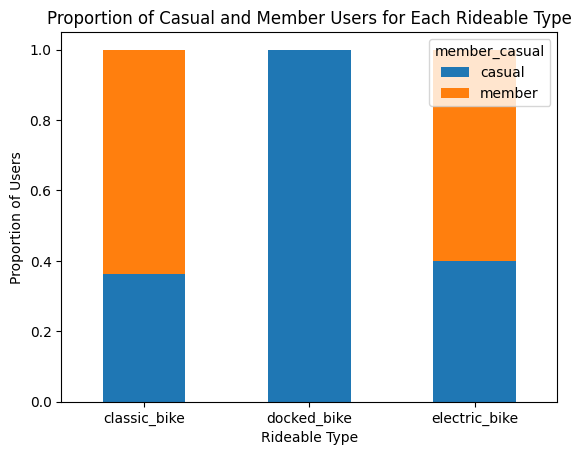

In [31]:
rideable_user_ratio.plot.bar(stacked=True)

ind = np.arange(len(rideable_user_ratio))
plt.xticks(ind, rideable_user_ratio.index, rotation="horizontal")

plt.title("Proportion of Casual and Member Users for Each Rideable Type")
plt.xlabel("Rideable Type")
plt.ylabel("Proportion of Users")

**Interpretation**

Non of member user use Docked bikes, indicating member-specific preferences or modes of operation, while e-bikes and classic bikes are used by both user types, with a fairly even distribution, with about a 60-40 split between members and recreational bike users. This suggests that recreational users do not have a strong preference for bike type overall.

### 5.2 Trip Duration

#### 5.2.1 Average Trip Duration for Casual and Member user ####

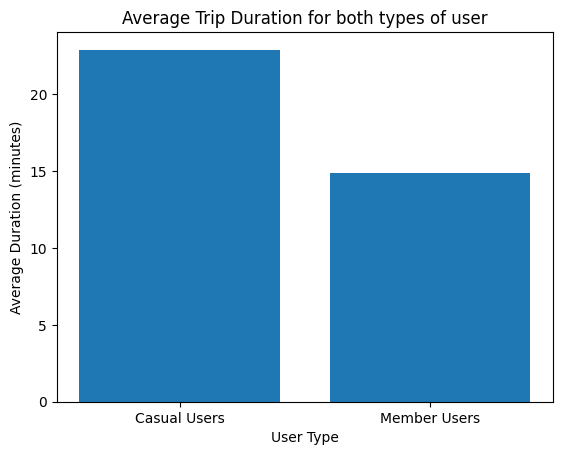

In [32]:
# Convert time into minutes
casual_avg_minutes = casual_avg_duration.total_seconds() / 60
member_avg_minutes = member_avg_duration.total_seconds() / 60

labels = ["Casual Users", "Member Users"]
average_durations = [casual_avg_minutes, member_avg_minutes]

plt.bar(labels, average_durations)

plt.xlabel("User Type")
plt.ylabel("Average Duration (minutes)")
plt.title("Average Trip Duration for both types of user")

plt.show()

**Interpretation**

The bar chart shows that the average trip duration for casual users is approximately one-third longer than that for member users. 

#### 5.2.2 Average Trip Duration by MONTH for Casual and Member user ####

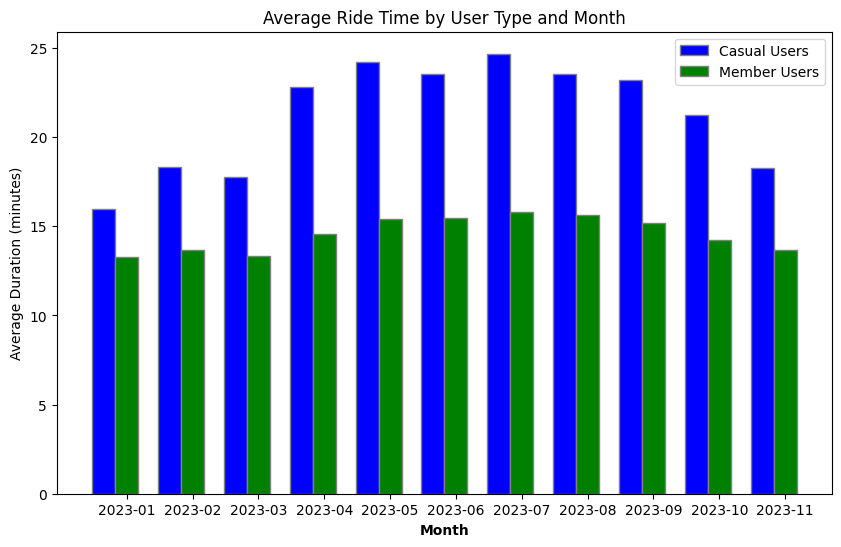

In [33]:
# Convert the average trip durations from timedelta to minutes
casual_avg_minutes_by_month = casual_avg_by_month.dt.total_seconds() / 60
member_avg_minutes_by_month = member_avg_by_month.dt.total_seconds() / 60

months = casual_avg_minutes_by_month.index.strftime("%Y-%m")  # Formatting the month as Year-Month
casual_averages = casual_avg_minutes_by_month.values
member_averages = member_avg_minutes_by_month.values

bar_width = 0.35

# Set position of bar on X axis
r1 = np.arange(len(casual_averages))
r2 = [x + bar_width for x in r1]

# Make the plot
plt.figure(figsize=(10, 6))
plt.bar(r1, casual_averages, color="blue", width=bar_width, edgecolor="grey", label="Casual Users")
plt.bar(r2, member_averages, color="green", width=bar_width, edgecolor="grey", label="Member Users")

# Add xticks on the middle of the group bars
plt.xlabel("Month", fontweight="bold")
plt.xticks([r + bar_width for r in range(len(casual_averages))], months)

plt.title("Average Ride Time by User Type and Month")
plt.ylabel("Average Duration (minutes)")
plt.legend()

plt.show()



**Interpretation**

From the chart we can observe:

**Consistent trend:** Across all months, casual users ride longer on average compared to member users. This consistency suggests that casual users continue to ride longer distances year-round.

**Seasonal changes:** There appears to be some seasonal changes, with certain months showing large gaps between user types. This could be due to weather conditions, holidays, or other seasonal factors that affect how people use bike sharing services.

Another surprising thing is that the January data shows that the average ride time difference between casual users and member users (casual users are only about 3 minutes longer than members on average), which coincides with the data we obtained before (but we have not do data cleaning before).

### 5.3 Day of Week

#### 5.3.1 Ride in Weekday VS Weekend ####


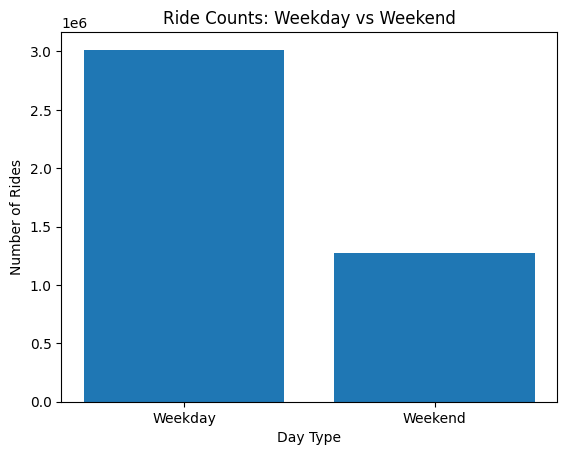

In [34]:
# Calculate the number of rides on weekdays and weekends
num_rides_weekday = weekday_df.shape[0]
num_rides_weekend = weekend_df.shape[0]

# Create labels and corresponding values
labels = ["Weekday", "Weekend"]
day_of_the_week_counts = [num_rides_weekday, num_rides_weekend]

# Create the bar graph
plt.bar(labels, day_of_the_week_counts)

# Set the labels and title
plt.xlabel("Day Type")
plt.ylabel("Number of Rides")
plt.title("Ride Counts: Weekday vs Weekend")

# Display the plot
plt.show()

**Interpretation**

We can observe from the chart that the number of rides on weekdays is about 2.5 times more than the number of rides on weekends for both types of users. This illustrates that no matter which type of user it is, it is obvious that everyone uses it more frequently on weekdays: Used for regular commuting to work, etc. However, not so much for leisure travel on weekends.


#### 5.3.2 Ride in Weekday for both types of users ####

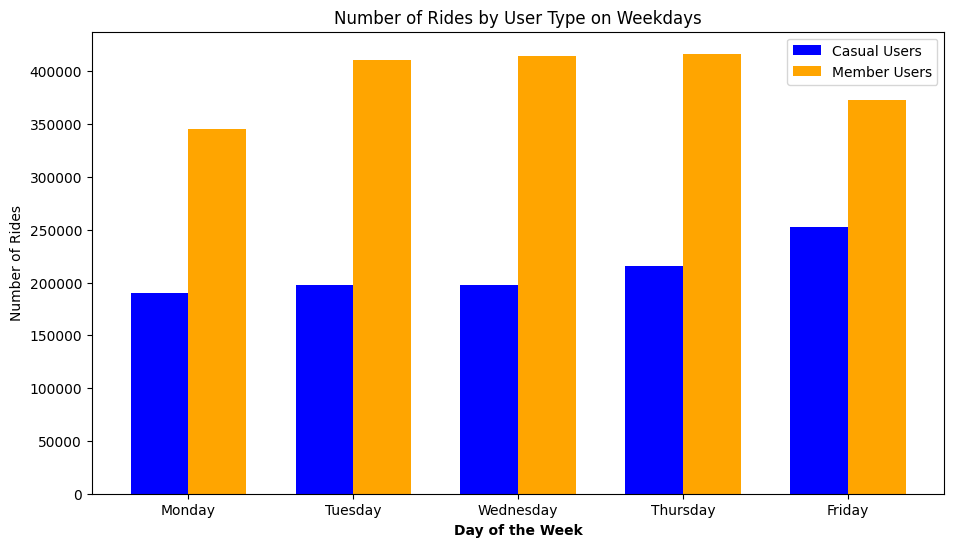

In [35]:
# Count the number of rides for casual and member users on each day of the week
weekday_casual_counts = weekday_df["Day of Week(Casual)"].value_counts().sort_index()
weekday_member_counts = weekday_df["Day of Week(Member)"].value_counts().sort_index()

# Prepare the data for plotting
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
casual_counts = [weekday_casual_counts.get(i, 0) for i in range(5)]
member_counts = [weekday_member_counts.get(i, 0) for i in range(5)]

# Define the width of the bars
bar_width = 0.35

# Set position of bar on X axis
r1 = np.arange(len(casual_counts))
r2 = [x + bar_width for x in r1]

# Create the bar graph
plt.figure(figsize=(11, 6))
plt.bar(r1, casual_counts, color="blue", width=bar_width, label="Casual Users")
plt.bar(r2, member_counts, color="orange", width=bar_width, label="Member Users")

# Add xticks on the middle of the group bars
plt.xlabel("Day of the Week", fontweight="bold")
plt.xticks([r + bar_width / 2 for r in range(len(casual_counts))], days)

plt.title("Number of Rides by User Type on Weekdays")
plt.ylabel("Number of Rides")
plt.legend()

plt.show()


**Interpretation**

From the graphs we can observe that:

Member usage is higher on weekdays: Chart shows that member users take approximately twice as many rides on weekdays as casual users. This suggests that members are more likely to use the service on an ongoing basis, perhaps to go to work or school, which typically occurs during the workday.

#### 5.3.3 Ride in Weekend for both types of users ####

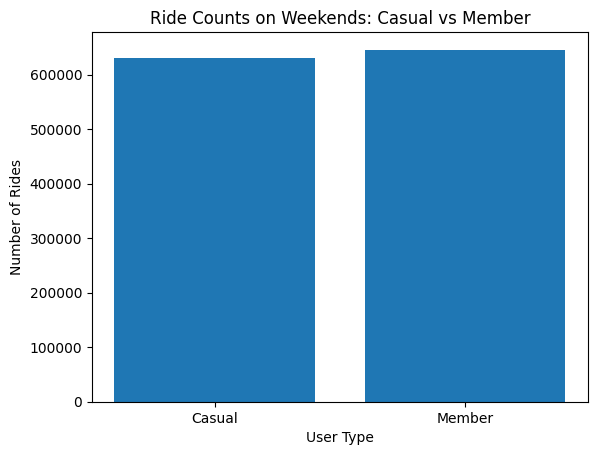

In [36]:
# Filter out rides that only happen for casual users on weekends
weekend_casual_df = weekend_df[weekend_df["member_casual"] == "casual"]

# Filter out rides that only happen for member users on weekends
weekend_member_df = weekend_df[weekend_df["member_casual"] == "member"]

# Count the number of rides for casual and member users on weekends
num_rides_weekend_casual = weekend_casual_df.shape[0]
num_rides_weekend_member = weekend_member_df.shape[0]

# Prepare data for the bar graph
labels = ["Casual", "Member"]
weekend_counts = [num_rides_weekend_casual, num_rides_weekend_member]

# Create the bar graph
plt.bar(labels, weekend_counts)

plt.xlabel("User Type")
plt.ylabel("Number of Rides")
plt.title("Ride Counts on Weekends: Casual vs Member")

plt.show()


**Interpretation**

From the graphs we can observe that:

Weekend usage comparison: The second graph shows that casual users and member users take relatively similar numbers of rides on weekends. This may indicate that bike sharing services are popular with these two user groups for weekend leisure activities.




## 5.4 Overall Conclusion & Suggestion

Based on the visualization, we can synthesize the results to answer the question of how annual members and recreational riders use their bikes differently:

1. **Proportion of Rides by User Type:** Members make up a larger proportion of the rides compared to casual users. This suggests that members are the more consistent user group, potentially using the service for regular commutes or as a part of their daily routine.
2. **Proportion of Rides by Rideable Type:** Both electric and classic bikes are used nearly equally by the overall user base, but docked bikes are used much less. This might indicate a preference for versatility and convenience, as electric and classic bikes may offer more flexibility in terms of parking and availability.
3. **Proportion of Casual and Member Users for Each Rideable Type:** Classic bikes and eletric bikes are popular with both types of users. No member users use docked bikes, which may be due to poor convenience or availability.
4. **Average Trip Duration:** Casual users have longer trip durations than member users, suggesting that casual users may be using the service more for leisure or exploration, while member users might be using the bikes for more purposeful and routine trips, such as commuting.
5. **Average Ride Time by User Type and Month:** There is a seasonal trend visible, with ride times generally longer in warmer months, indicating possible weather-related influence on bike usage. Casual users consistently spend more time per ride than members throughout the year.
6. **Ride Counts: Weekday vs Weekend:** There are more rides during weekdays compared to weekends. This could be due to the use of bikes for commuting on weekdays. The difference in the number of rides between casual and member users is much greater on weekdays than on weekends.
7. **Ride Counts by User Type on Weekdays:** Members use the service more than casual users on all weekdays, suggesting a strong habit or need for the service during the workweek, likely for commuting.
8. **Ride Counts on Weekends:** During weekends, the number of rides by casual and member users is more comparable, indicating that members and casual users alike use the service for leisure or non-commuting activities.

From these insights, we can conclude that annual members are likely relying on the bike-sharing service as a regular means of transportation, possibly integrated into their daily routines, particularly on weekdays for commuting. In contrast, casual riders seem to use the service more recreationally, indicated by longer trip durations and a slightly higher proportion of weekend use compared to members.

These patterns can inform Cyclistic’s operational and marketing strategies, suggesting a focus on reliability and quick service for members, especially on weekdays, and potentially more targeted marketing towards casual users to convert them into members by emphasizing the benefits of membership for frequent riders. Moreover, promotional activities could be designed to increase casual user engagement during weekdays and to encourage member usage during weekends, potentially through events or special weekend offers.

### 5.4.1 What's next..

Next, we can consider developing a machine learning model, such as a decision tree, to predict rider behavior. Constructing a model will aid in understanding the factors influencing casual riders to convert into registered members. This predictive insight can then be leveraged to tailor strategies that encourage casual users to become members.